In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Bernstein Vazirani

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [3]:
secret = "110100111011"

In [4]:
n = len(secret)

In [5]:
# build quantum circuit
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

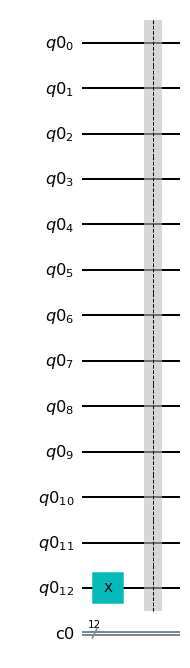

In [6]:
# create the |y> register
qc.x(q[n])
qc.barrier()
qc.draw("mpl")

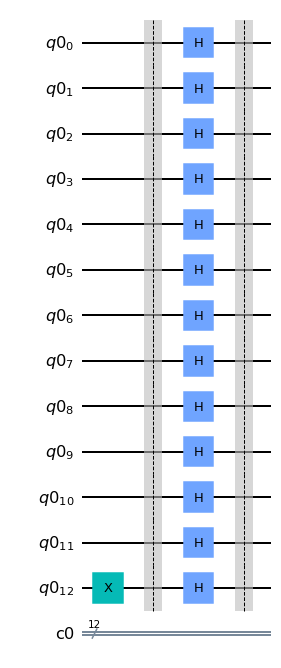

In [7]:
# apply hadamard gates to all the qubits
for i in range(n+1):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

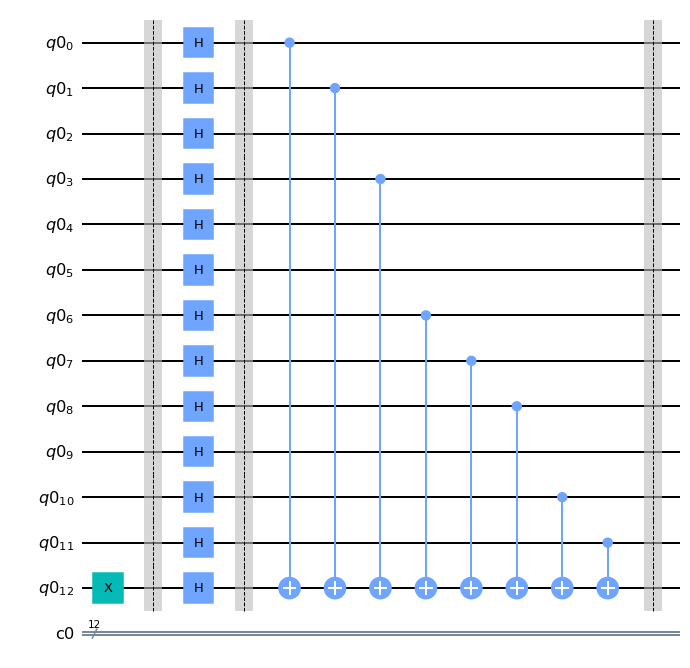

In [8]:
# build the oracle |y x f(x)> x |x>
for i in range(n):
  if secret[i] == "1":
    qc.cx(q[i],q[n])
qc.barrier()
qc.draw("mpl")

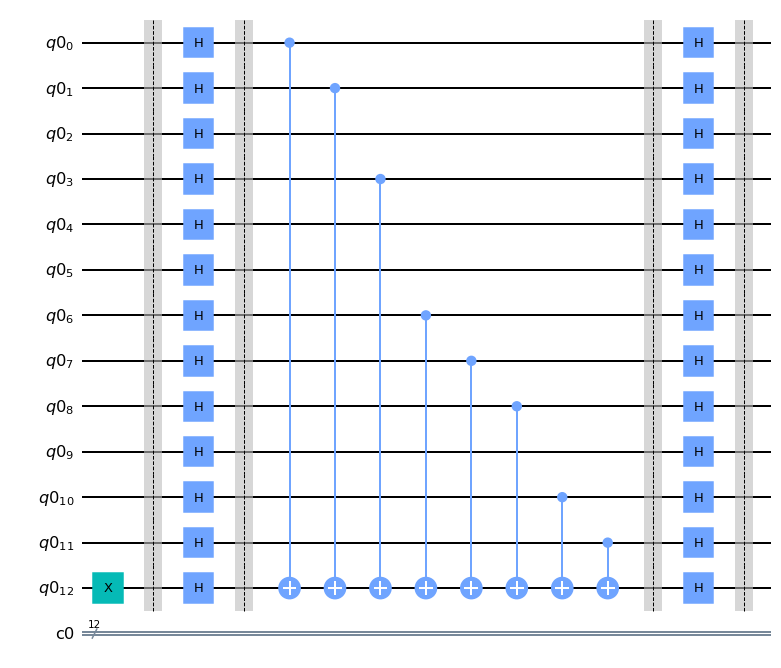

In [9]:
# apply more hadamard gates
for i in range(n+1):
  qc.h(q[i])
qc.barrier()
qc.draw("mpl")

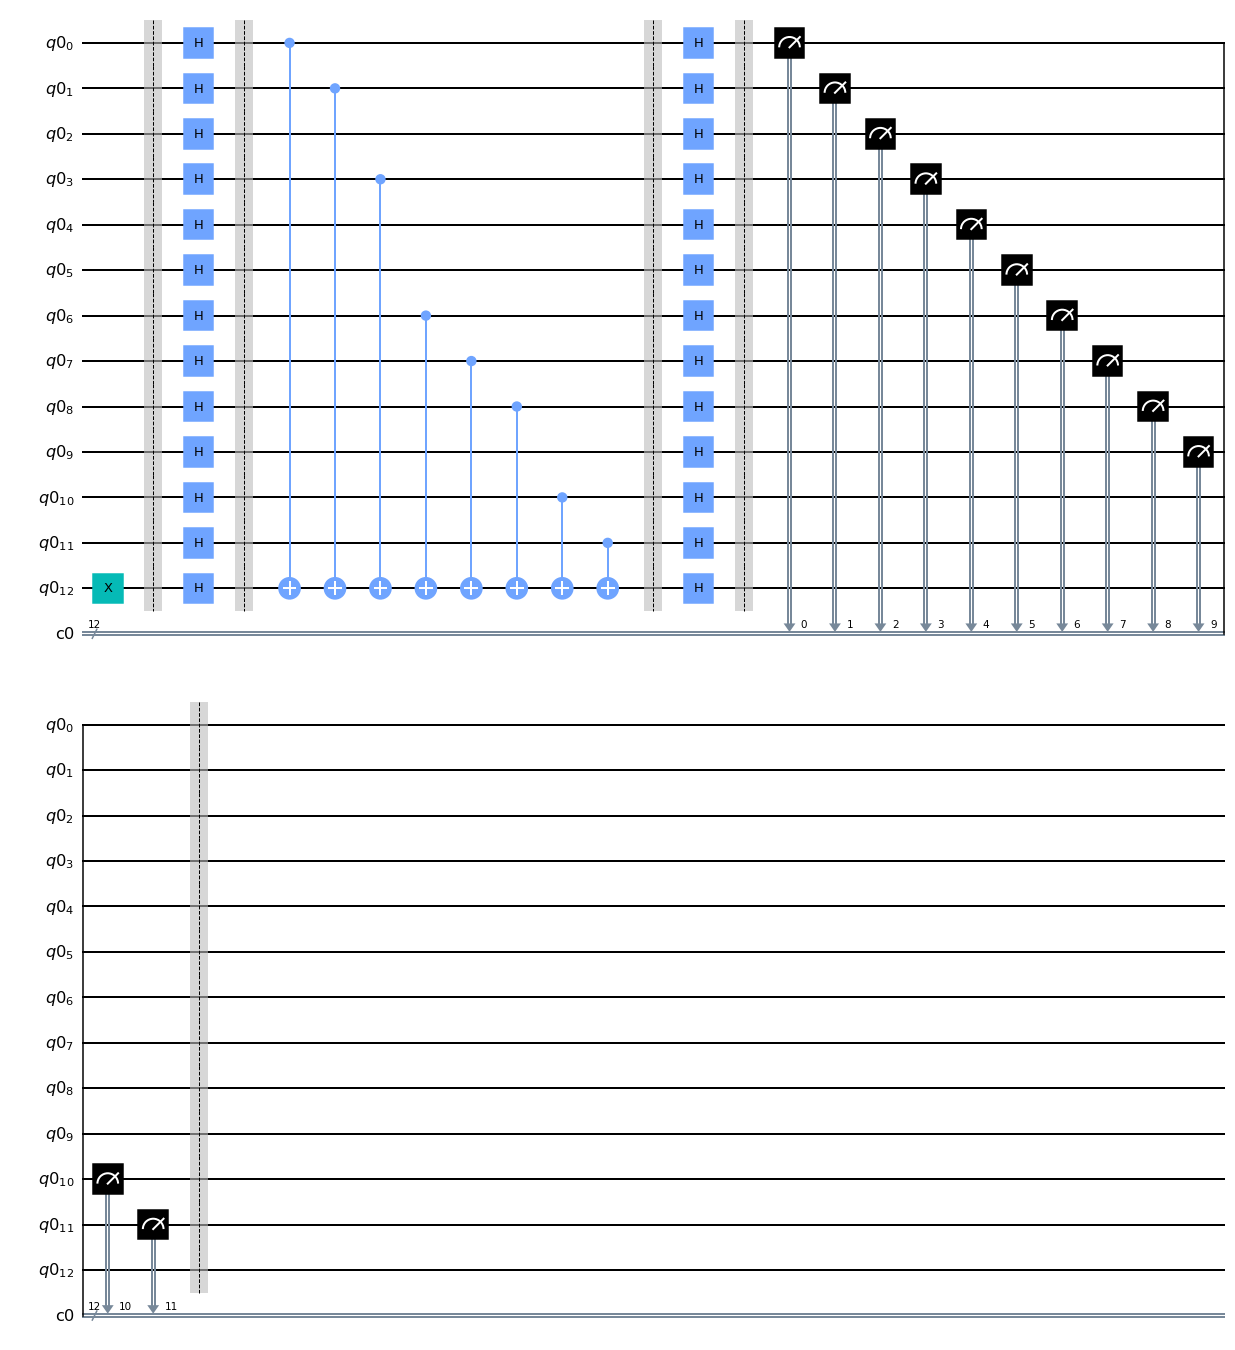

In [10]:
# ignore |y> and make measurements in the rest of the qubits
for i in range(n):
  qc.measure(q[i],c[i])
qc.barrier()
qc.draw("mpl")

In [11]:
# execute the circuit on an ideal quantumc computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'110111001011': 1024}


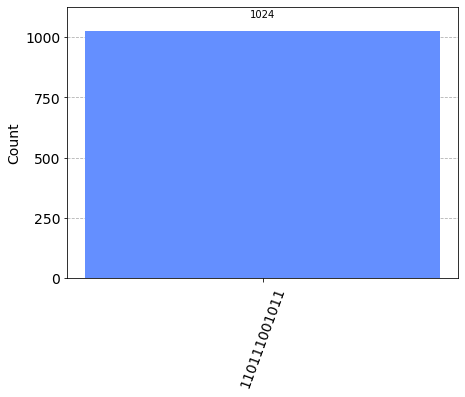

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [13]:
from qiskit.providers.fake_provider import FakeCambridge
from qiskit.visualization import plot_error_map

In [14]:
device_simulation = FakeCambridge()

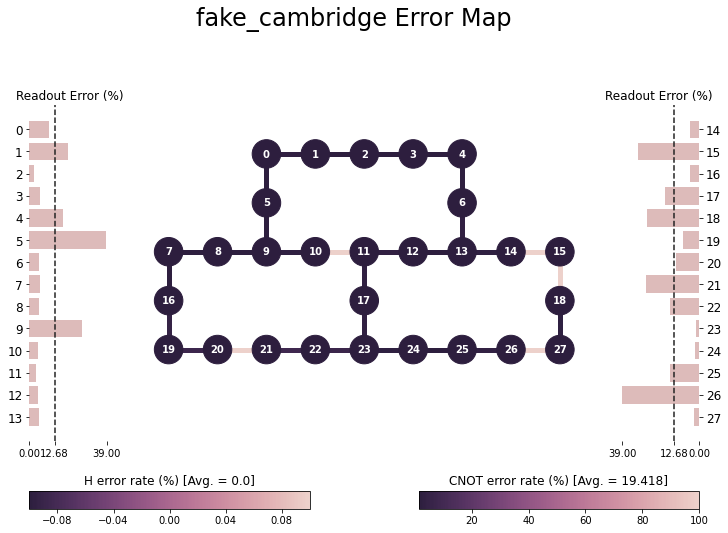

In [15]:
plot_error_map(device_simulation)

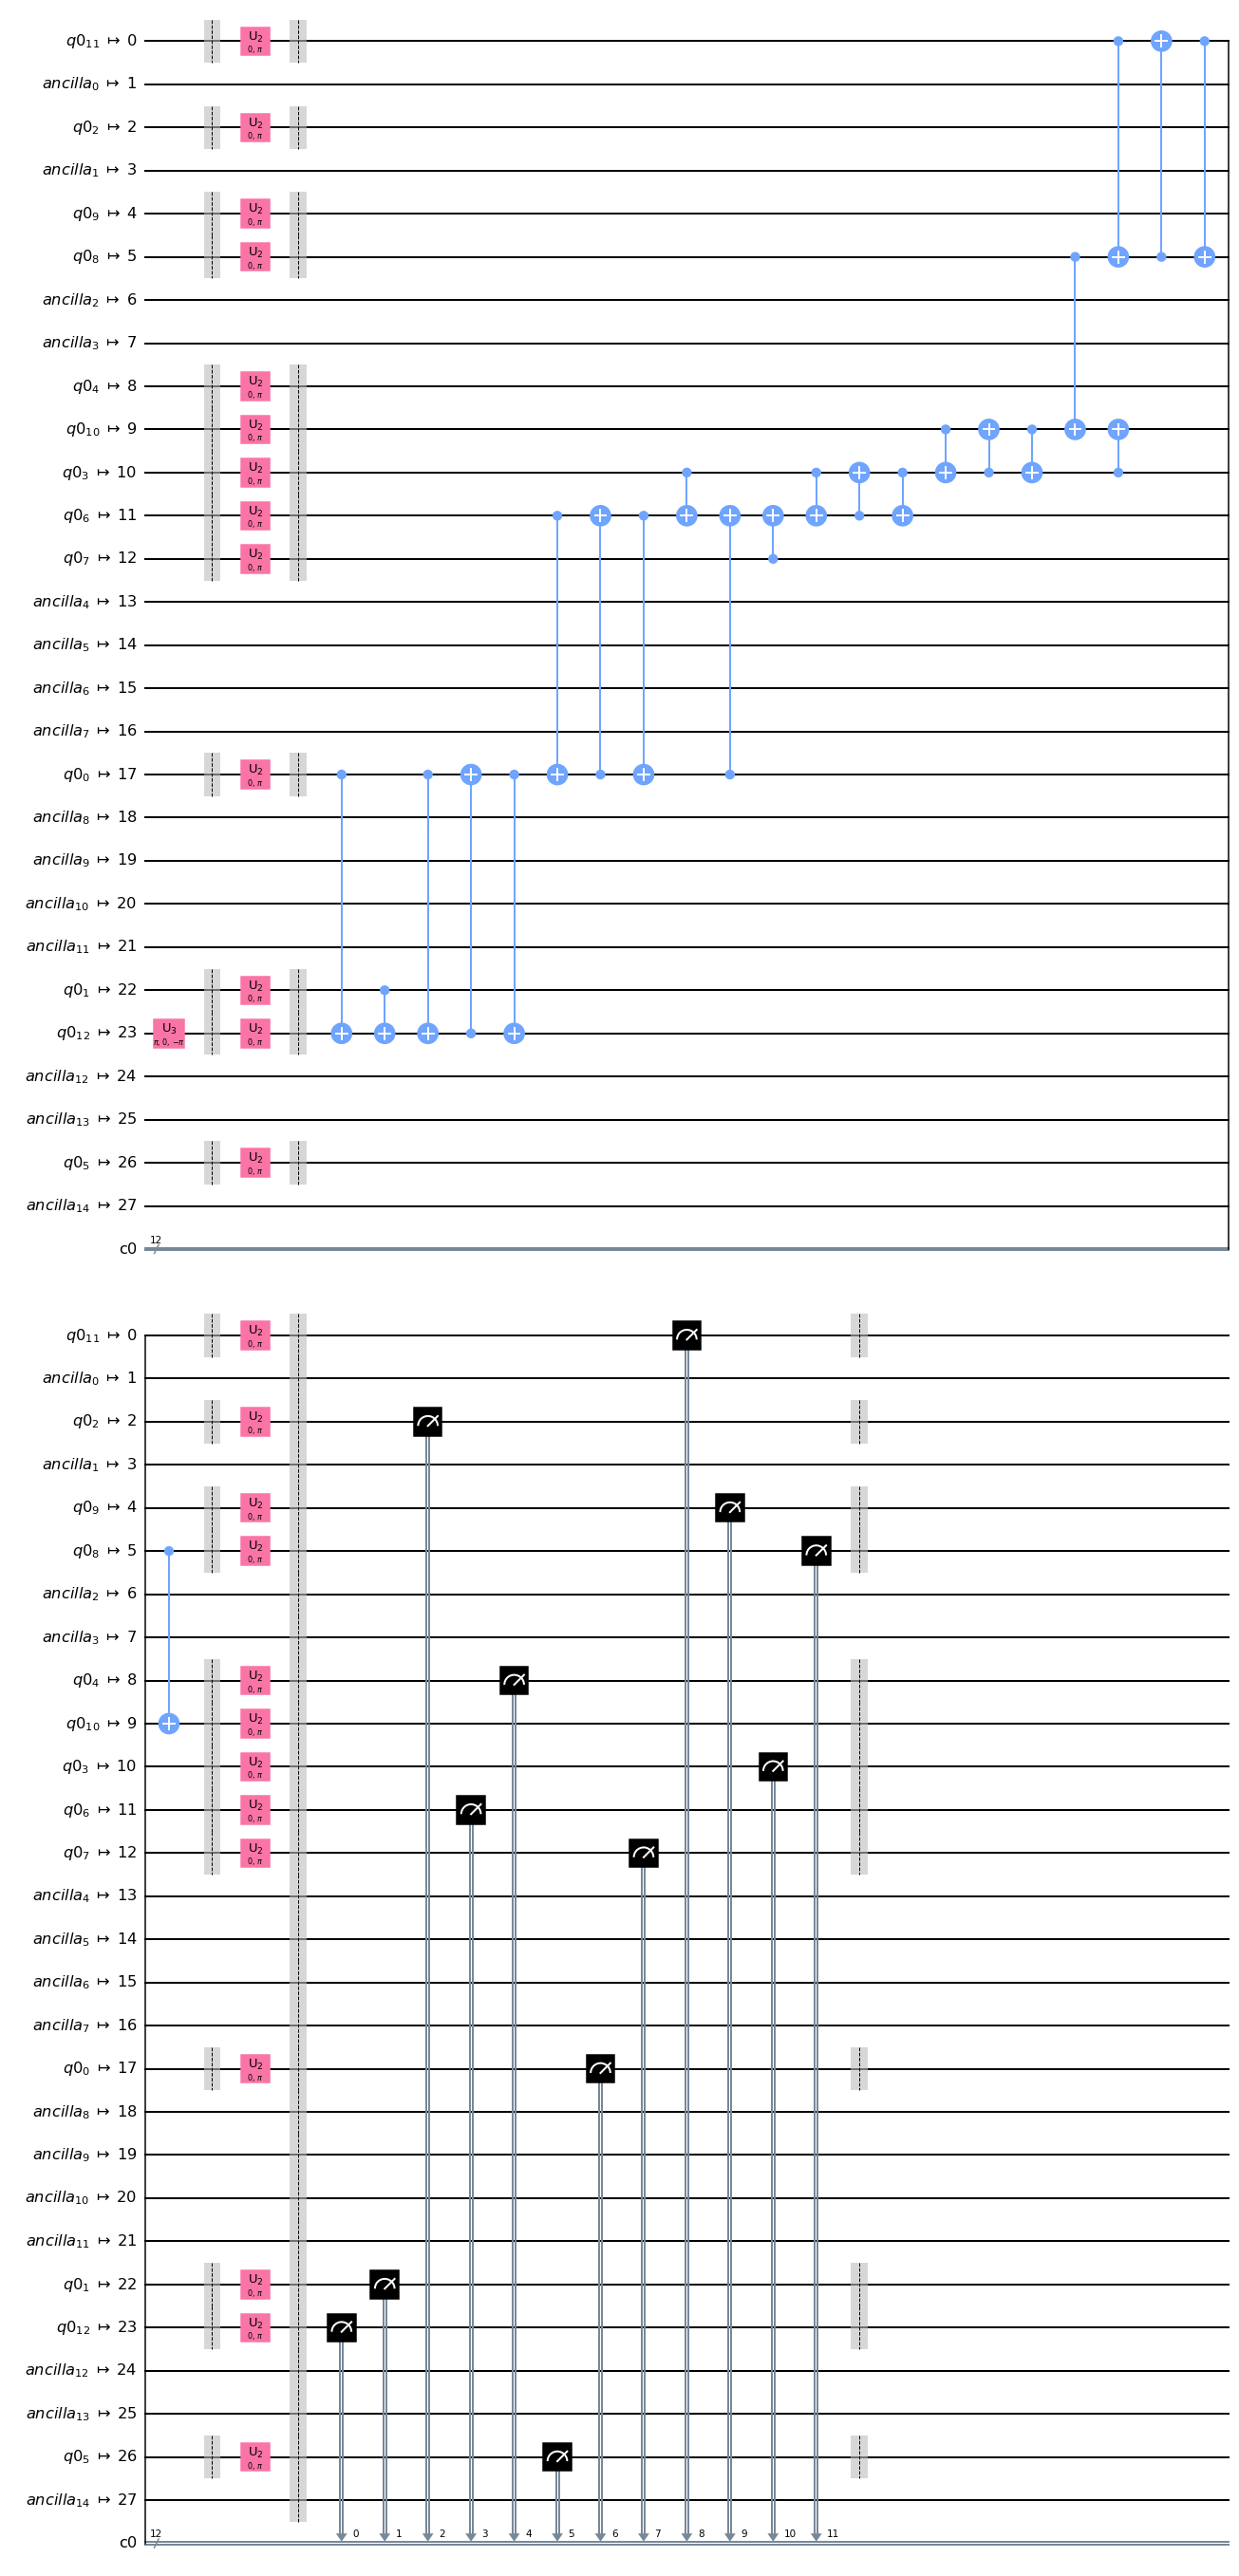

In [16]:
qc2 = transpile(qc,device_simulation)
qc2.draw('mpl')

In [17]:
from qiskit.visualization import plot_circuit_layout

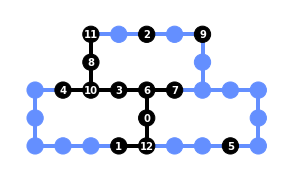

In [18]:
plot_circuit_layout(qc2,device_simulation)

In [19]:
job = device_simulation.run(qc2,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'101100001011': 2, '000110100011': 1, '011100101011': 1, '100001101011': 1, '010100101011': 1, '110000100001': 1, '100101000011': 1, '110001100010': 1, '000011111000': 1, '000000101011': 2, '001100000001': 1, '111010101011': 1, '110000011001': 1, '000010001010': 1, '110101000000': 1, '110011000001': 1, '101011001001': 2, '000000000010': 1, '001001001011': 1, '110011101010': 1, '100110101001': 1, '000010000010': 1, '110110001001': 5, '111011001011': 1, '100110001001': 3, '101000000000': 1, '111110001011': 4, '110111100001': 3, '110110100010': 1, '101111110001': 1, '111110000001': 2, '100110101011': 2, '010100011010': 1, '110000011101': 1, '101000101011': 2, '101111000011': 2, '000001101010': 1, '110100101011': 12, '000010100011': 1, '101000000011': 5, '100100000011': 7, '111100100011': 1, '000001100001': 1, '100101001001': 1, '100101101001': 1, '001000000011': 2, '110010010011': 1, '111110000011': 3, '100111000001': 2, '110000001011': 5, '000100101001': 1, '010111001000': 1, '000100000

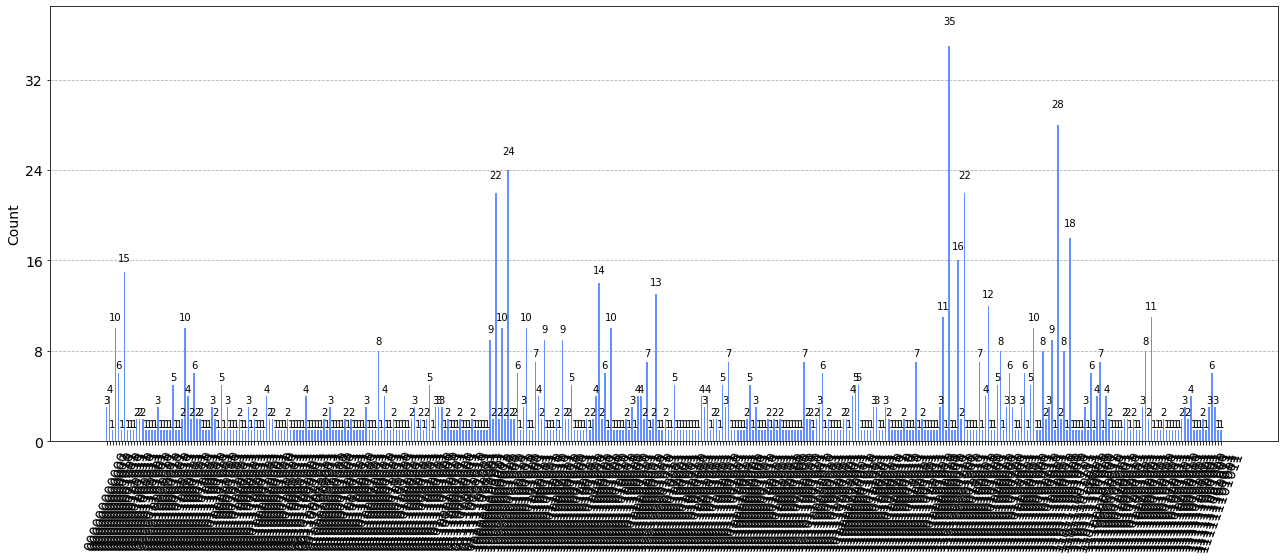

In [20]:
plot_histogram(counts,figsize = (22,8))